# GPS Data Set for Practice (Linear Regression & Logistic Regression)

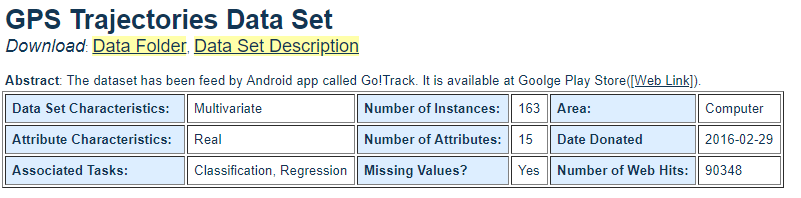

### Attribute Information:
<div class="alert alert-block alert-info">

go_track_tracks.csv: a list of trajectories 
1. id_android - it represents the device used to capture the instance; 
2. speed - it represents the average speed (Km/H) 
3. distance - it represent the total distance (Km) 
4. rating - it is an evaluation parameter. Evaluation the traffic is a way to verify the volunteers perception about the traffic during the travel, in other words, 
if volunteers move to some place and face traffic jam, maybe they will evaluate 'bad'. (3- good, 2- normal, 1-bad). 
5. rating_bus - it is other evaluation parameter. (0 - Empty bus, 1 - The amount of people inside the bus is little, 2 - The bus is not crowded, 3- The bus is crowded. 
6. rating_weather - it is another evaluation parameter. (0 - Normal, 1- raining, 2- sunny). 
7. car_or_bus - (1 - car, 2-bus) 
8. linha - information about the bus that does the pathway 


https://archive.ics.uci.edu/ml/datasets/GPS+Trajectories

**Citation Request:**

We have some papers that used this dataset. The first was presented in BRACIS (4th Brazilian Conference on Intelligent System). 
The paper was accepted but not published yet. 
The other paper was submitted to AT&T (IJCAI-16). 
The last paper is about the dataset. 

### Goal is to find out following
<div class="alert alert-block alert-warning">

**EDA**
1. How many users use car or bus or both?
2. Plot distance vs time (For car & bus)
3. Plot speed vs weather (For car & bus)
4. Plot speed vs weather vs bus rating
3. Average communiting time by Bus or Car?
    
**With Linear Regression can we analyze following**
> **Simple Linear Regression**

Where: 
- Y = Distance Travelled
- X = Speed 

> **Complex Linear Regression**

- Factors impacting rating (Y - Dependent variable)
- Explaintory variable: X1 = Bus Rating, X2 = Weather rating, X3 = Car or bus, X4 = Speed

**With Logistic Regression can we analyze following**
- Filter users who use car and bus both & find probablity based on weather, if they will use a car or bus?

**With Decision Tree can we analyze following**
- Filter users who use car and bus both & identify when they use car and when they use bus
    >Is it the weather rating or bus rating

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import pandas_profiling
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/omsarmalkar/Machine-Learning/Linear-Regression-Practice/go_track_tracks.csv', index_col=0)
data.head()

,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
id,,,,,,,,,
1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [4]:
data.shape    #checking shape of data

(163, 9)

In [5]:
data.info()   # info of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 1 to 38092
Data columns (total 9 columns):
id_android        163 non-null int64
speed             163 non-null float64
time              163 non-null float64
distance          163 non-null float64
rating            163 non-null int64
rating_bus        163 non-null int64
rating_weather    163 non-null int64
car_or_bus        163 non-null int64
linha             80 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 12.7+ KB


In [6]:
data.sample(5)   #data sample

,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
id,,,,,,,,,
248,10,24.003004,0.288464,6.924,3,1,2,2,051 - ATALAIA CENTRO
31,3,54.995947,1.014075,55.770,3,0,0,1,NaN
50,5,37.140902,0.500849,18.602,3,0,0,2,NaN
17,3,14.440098,0.268142,3.872,3,0,0,1,NaN
38072,24,36.647072,0.200071,7.332,3,0,0,1,carro


In [7]:
data = data[['id_android','speed','time','distance','rating','rating_bus','rating_weather','car_or_bus']] #Filtering data

In [8]:
data = data.reset_index(drop=True)  #reset index

In [9]:
data.head(5)   #rechecking index reset with sample

,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
0,0,19.210586,0.138049,2.652,3,0,0,1
1,0,30.848229,0.171485,5.290,3,0,0,1
2,1,13.560101,0.067699,0.918,3,0,0,2
3,1,19.766679,0.389544,7.700,3,0,0,2
4,0,25.807401,0.154801,3.995,2,0,0,1


In [10]:
data.describe(include = 'all')    #describe the data (No observations here)

,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,7.386503,16.704738,0.264272,5.302411,2.515337,0.386503,0.515337,1.466258
std,7.348742,16.016168,0.292731,7.639011,0.679105,0.687859,0.841485,0.500397
min,0.000000,0.009779,0.002175,0.001000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,1.591016,0.035978,0.034500,2.000000,0.000000,0.000000,1.000000
50%,4.000000,16.685368,0.214466,3.995000,3.000000,0.000000,0.000000,1.000000
75%,10.000000,23.915760,0.390572,7.333000,3.000000,1.000000,1.000000,2.000000
max,27.000000,96.206029,1.942948,55.770000,3.000000,3.000000,2.000000,2.000000


In [11]:
pandas_profiling.ProfileReport(data)     #Post Profiling report

### Observations
- Drop duplicates 
- replace zero values in android id with mode

In [12]:
data = data.drop_duplicates(subset=None, keep='first', inplace=False)  #dropping duplicates

In [13]:
data.id_android.mode()   #checking mode of android id to fix missing values

0    1
dtype: int64

In [14]:
data['id_android']=data['id_android'].replace(0,1)  #replacing with mode

In [15]:
pandas_profiling.ProfileReport(data)    # Post profiling report

In [16]:
data.rename(columns={'id_android':'user'}, inplace=True)   #renaming column name
 
print(data.columns)

Index(['user', 'speed', 'time', 'distance', 'rating', 'rating_bus',
       'rating_weather', 'car_or_bus'],
      dtype='object')


In [17]:
data.user.unique()    #checking unique values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

In [18]:
data.rating	.unique()    #checking unique values

#Rating - (3- good, 2- normal, 1-bad)

array([3, 2, 1], dtype=int64)

In [19]:
data.rating_bus.unique()     #checking unique values
  
#1 - The amount of people inside the bus is little, 
#2 - The bus is not crowded, 
#3- The bus is crowded.

array([0, 3, 1, 2], dtype=int64)

In [20]:
data.rating_weather.unique()     #checking unique values

#( 2- sunny, 1- raining).

array([0, 1, 2], dtype=int64)

In [21]:
data.car_or_bus.unique()     #checking unique values

#(1 - car, 2-bus)

array([1, 2], dtype=int64)

In [22]:
data1 = data.copy(deep=True)      #creating duplicate copy

## EDA
<div class="alert alert-block alert-info">
    
1. How many users use car or bus or both?
2. Plot distance vs time (For car & bus)
3. Plot speed vs weather (For car & bus)
4. Plot speed vs weather vs bus rating
3. Average communiting time by Bus or Car?

<div class="alert alert-block alert-warning">
    
1. **How many users use car or bus or both?**

In [23]:
total = data.groupby(['car_or_bus'])['user'].count().reset_index()          #grouping
total = total.sort_values(by = ['car_or_bus','user'], ascending=True)           #sorting
total

,car_or_bus,user
0,1,76
1,2,70


In [24]:
data.loc[data['car_or_bus'] == 1,:].shape[0]  #simplified formula to calculate above

76

In [25]:
data.loc[data['car_or_bus'] == 2,:].shape[0] #simplified formula to calculate above

70

*76 times in total car was used, 70times in total bus was used*

**Dummyfication**

In [26]:
dummy = pd.get_dummies(data1, columns=['car_or_bus'], drop_first=False)   #creating dummies
dummy.rename(columns={'car_or_bus_1':'car','car_or_bus_2':'bus'}, inplace=True)   #Replacing column headers
dummy1 = dummy[['user','car','bus']]   #selecting only required columns for analysis

dummy1.sample(4)

,user,car,bus
156,24,1,0
93,10,1,0
60,8,1,0
14,4,1,0


**Users only using car**

In [27]:
total = dummy1.groupby(['user'])['car'].sum().reset_index()         #grouping
total_car_users = total.sort_values(by = ['user','car'], ascending=True)        #sorting
total_car_users = total_car_users[total_car_users['car']!= 0]           #Filtering our car = 0
car_users = total_car_users.car.count()
print("Total Car users are {}".format(car_users))

Total Car users are 15


In [28]:
total1 = dummy1.groupby(['user'])['bus'].sum().reset_index()        #grouping
total_bus_users = total1.sort_values(by = ['user','bus'], ascending=True)         #sorting
total_bus_users = total_bus_users[total_bus_users['bus']!= 0]           #Filtering our bus = 0
bus_users = total_bus_users.bus.count()
print("Total Bus users are {}".format(bus_users))

Total Bus users are 17


In [29]:
Total_users = dummy1.groupby(['user',])['car','bus'].sum().reset_index()          #grouping
cb_users = Total_users.sort_values(by = ['user','car',"bus"], ascending=True)           #sorting
cb_users = cb_users[Total_users['bus']!= 0]   #Filtering our bus = 0
cb_users = cb_users[cb_users['car']!= 0]         #Filtering our car = 0
cb_users_total = cb_users.user.count()     
print("Total users who use Bus & car both are {}".format(cb_users_total))

Total users who use Bus & car both are 5


In [30]:
Total_users   #List of all users and car & bus total

,user,car,bus
0,1,22,35
1,2,1,1
2,3,11,0
3,4,3,3
4,5,0,1
5,6,0,1
6,7,6,0
7,8,6,0
8,9,4,0
9,10,4,17


In [31]:
Alternate1 = pd.merge(left=total_car_users, right=total_bus_users, on='user')   #Alternate merge method to find car and bus users
Alternate1

,user,car,bus
0,1,22,35
1,2,1,1
2,4,3,3
3,10,4,17
4,13,1,1


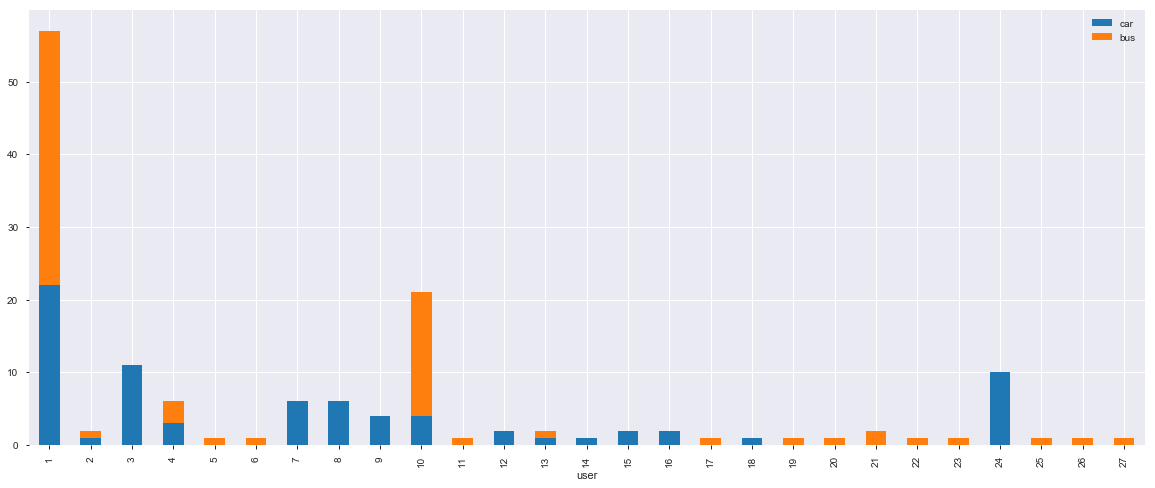

In [32]:
plot1 = Total_users.set_index('user')       
plot1.plot.bar(stacked=True, figsize=(20,8))          #Plotting all 27users used stacked bar

**In Total 163 observations there are 27 users**
<div class="alert alert-block alert-info">
    
- 76 times Car was used
- 70 times Bus was used
- Total Car users are 15
- Total Bus users are 17
- Users who use car and bus both are 5

<div class="alert alert-block alert-warning">
    
2. **Plot distance vs time (For car & bus)**

Text(0.5, 1.0, 'Time vs Distance for Car')

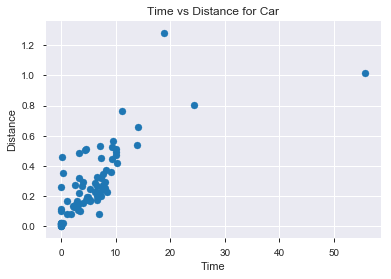

In [33]:
plot3 = dummy[dummy['car']!= 0]        #Scatter Plot for car

plt.scatter(plot3.distance,plot3.time)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title("Time vs Distance for Car")

Text(0.5, 1.0, 'Time vs Distance for Car')

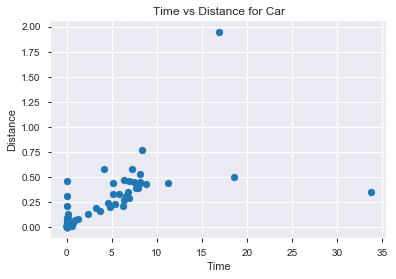

In [34]:
plot3 = dummy[dummy['bus']!= 0]        #Scatter Plot for bus

plt.scatter(plot3.distance,plot3.time)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title("Time vs Distance for Car")

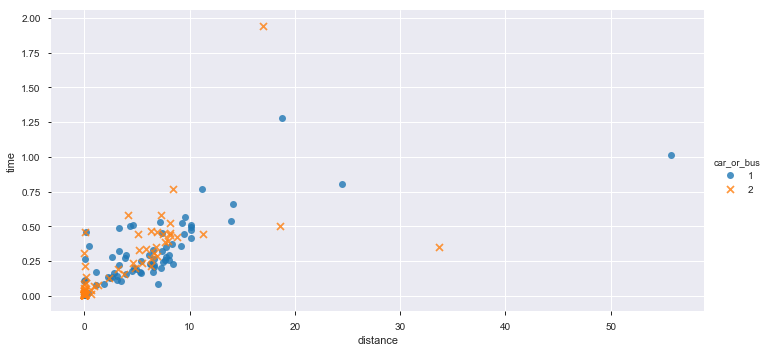

In [35]:
sns.lmplot(x='distance', y='time', hue='car_or_bus',         #Scatter Plot for car and bus
           data=data.loc[data['car_or_bus'].isin(['1', '2'])], 
           fit_reg=False,  height=5, aspect=2, markers=["o", "x"])

**Time vs distance for Car and bus**
<div class="alert alert-block alert-info">
    
No specific observation although there are some outliers observed

<div class="alert alert-block alert-warning">

3. **Plot speed vs weather (For car & bus)**

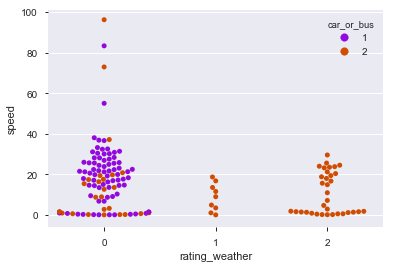

In [36]:
sns.swarmplot(x="rating_weather", y="speed", hue="car_or_bus", palette="gnuplot", data=data1)   #swarm plot for car and bus

<div class="alert alert-block alert-info">

Weather rating (0 - Normal, 1- raining, 2- sunny)

- Its not accuraltely conclusive although when it sunny or rainy people take bus

<div class="alert alert-block alert-warning">

4. **Plot speed vs weather vs bus rating**

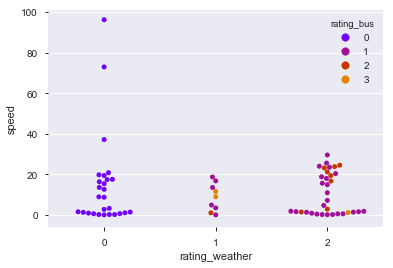

In [37]:
plot4 = data1[data1['car_or_bus']!= 1]   #Filtering out car

sns.swarmplot(x="rating_weather", y="speed", hue="rating_bus", palette="gnuplot", data=plot4)   #swarm plot to analyze bus rating

<div class="alert alert-block alert-info">

Weather rating (0 - Normal, 1- raining, 2- sunny)

Bus Rating - (
0 - Bus is empty
1 - The amount of people inside the bus is little, 
2 - The bus is not crowded, 
3 - The bus is crowded.)

- Bus is crowded during the rains and when its sunny; Speed of bus looks constant in all tyoe of weather

<div class="alert alert-block alert-warning">

5. **Average communiting time/distance/speed by Bus or Car?**

In [38]:
car_avg = data1[data1['car_or_bus']!= 2]                                 #Filtering out bus
car_avg_time = car_avg['time'].sum()/car_avg['time'].count()             #Calculating avg time
car_t = car_avg_time.round(2)                                            #Rounding avg time
print( "Average travel time by car for users is {} hours".format(car_t))

Average travel time by car for users is 0.28 hours


In [39]:
bus_avg = data1[data1['car_or_bus']!= 1]                                 #Filtering out car
bus_avg_time = bus_avg['time'].sum()/bus_avg['time'].count()             #Calculating avg time
bus_t = bus_avg_time.round(2)                                            #Rounding avg time
print( "Average travel time by car for users is {} hours".format(bus_t))

Average travel time by car for users is 0.21 hours


In [40]:
car_avg = data1[data1['car_or_bus']!= 2]                                     #Filtering out bus
car_avg_distance = car_avg['distance'].sum()/car_avg['time'].count()         #Calculating avg distance
car_d = car_avg_distance.round(2)                                            #Rounding avg Distance
print( "Average distance by car for users is {} Kms".format(car_d))

Average distance by car for users is 6.0 Kms


In [41]:
bus_avg = data1[data1['car_or_bus']!= 1]                                     #Filtering out car
bus_avg_distance = bus_avg['distance'].sum()/bus_avg['time'].count()         #Calculating avg distance
bus_d = bus_avg_distance.round(2)                                            #Rounding avg Distance
print( "Average distance by bus for users is {} Kms".format(bus_d))

Average distance by bus for users is 3.54 Kms


In [42]:
Avg_car_speeed = car_avg_distance/car_avg_time                #Diving car distance by time to calculate speed
car_s = Avg_car_speeed.round(1)                               #Rounding avg Speed
print( "Average car speed is {} Kms/hr".format(car_s))

Average car speed is 21.2 Kms/hr


In [43]:
Avg_bus_speeed = bus_avg_distance/bus_avg_time                #Diving bus distance by time to calculate speed
bus_s = Avg_bus_speeed.round(1)                               #Rounding avg Speed
print( "Average car speed is {} Kms/hr".format(bus_s))

Average car speed is 16.8 Kms/hr


## Simple Linear Regression

Where: 
- Y = Distance Travelled
- X = Speed 

In [44]:
data1.describe()

,user,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
count,146.00000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,7.40411,15.634092,0.248310,4.822459,2.493151,0.397260,0.527397,1.479452
std,7.60361,15.247806,0.263561,6.637088,0.687289,0.699551,0.848489,0.501297
min,1.00000,0.009779,0.002175,0.001000,1.000000,0.000000,0.000000,1.000000
25%,1.00000,1.455779,0.025661,0.027250,2.000000,0.000000,0.000000,1.000000
50%,4.00000,15.507826,0.201893,3.809500,3.000000,0.000000,0.000000,1.000000
75%,10.00000,23.162342,0.366580,7.324750,3.000000,1.000000,1.000000,2.000000
max,27.00000,96.206029,1.942948,55.770000,3.000000,3.000000,2.000000,2.000000


In [45]:
slr = data1[['speed','distance']]   #selecting only required columns for analysis (slr = simple linear regression) - now a dataset to analyze

In [46]:
slr.sample()

,speed,distance
27,10.288227,3.276


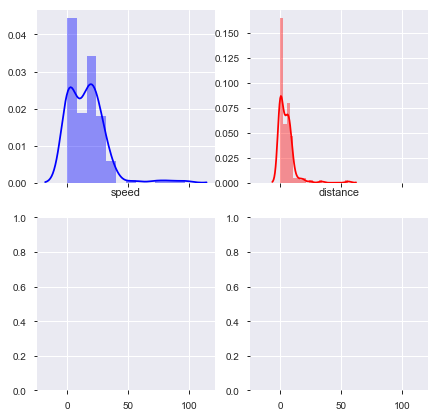

In [47]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(slr.speed, color="b", ax=axes[0, 0])

sns.distplot(slr.distance, color="r", ax=axes[0, 1])

### Checking for correlation

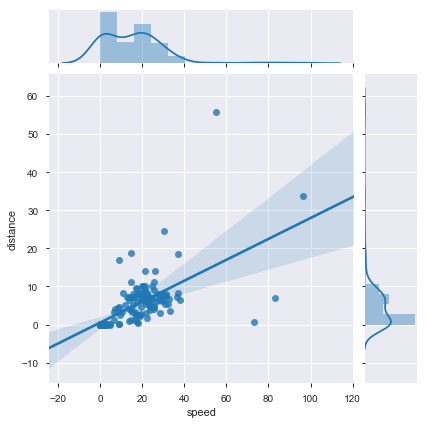

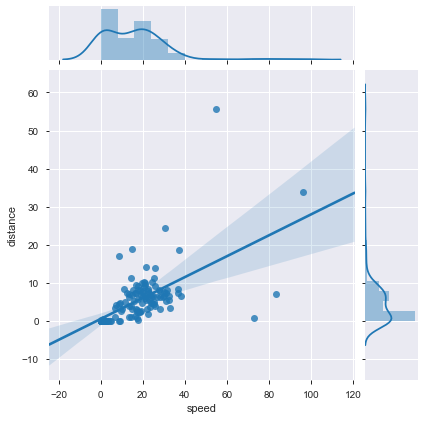

In [48]:
JG1 = sns.jointplot("speed", "distance", data=slr, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

In [49]:
slr.corr()

,speed,distance
speed,1.000000,0.630588
distance,0.630588,1.000000


__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

![image.png](attachment:image.png)

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, _sales and marketing spending_, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional sales income__ do I get for each additional $1000 spent on marketing?
- __trend__ forecasting.
    - what will the __price of house__ be in _6 months_?
    
***Linear Regression Equation with Errors in consideration***
While taking errors into consideration the equation of linear regression is: 
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

    
How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:
    
***Assumptions of Linear Regression***
1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.
    

### **Preparing X and y using pandas**

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(slr)
dataR = scaler.transform(slr)

In [51]:
dataR = pd.DataFrame(dataR)
dataR.head()

,0,1
0,0.235365,-0.328145
1,1.001227,0.070686
2,-0.136487,-0.590304
3,0.271961,0.435047
4,0.669495,-0.125101


In [52]:
dataR.columns = ['speed','distance']
dataR.sample()

,speed,distance
112,0.069183,0.394983


In [53]:
dataR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
speed       146 non-null float64
distance    146 non-null float64
dtypes: float64(2)
memory usage: 2.4 KB


In [54]:
feature_cols = ['speed']                # create a Python list of feature names
X = dataR[feature_cols]  
y = dataR.speed

In [55]:
# Splitting the dataset into training and test sets.
data_train, data_test = train_test_split(dataR, test_size = 0.2, random_state = 0)

In [56]:
# Dropping distance from x_train and x_test matrices, and creating y_train and y_test vectors for price values.
x_train = data_train.drop(['distance'], 1)
y_train = data_train['distance']
x_test = data_test.drop(['distance'], 1)
y_test = data_test['distance']

In [57]:
from sklearn.model_selection import train_test_split                 #importing train_test_split module

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [58]:
# Checking the shapes of training and test sets.
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (116, 1)
Shape of y_train:  (116,)
Shape of x_test:  (30, 1)
Shape of y_test:  (30,)


In [59]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
y_pred_train = linreg.predict(x_train)

In [61]:
y_pred_train[:10]          #Train prediction

array([-0.7009647 ,  0.25712433, -0.70441785, -0.65400104, -0.64817812,
       -0.08048619,  0.36212443, -0.01140923, -0.64545914, -0.08057019])

In [62]:
y_pred_test = linreg.predict(x_test)

In [63]:
y_pred_test[:10]              #test prediction

array([ 0.09882421, -0.23306785,  0.08449311, -0.17345305,  0.69428193,
        0.21206824, -0.68570651, -0.12474479,  0.06525853,  0.08821507])

## Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [64]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (116, 1)
y_train shape:  (116,)

Test cases as below
X_test shape:  (30, 1)
y_test shape:  (30,)


In [65]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):        
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
    y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

    RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
    print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

### Linear Regression Model without GridSearcCV
Note:  Linear Regression Model with GridSearcCV is implemented at Table of Contents

In [66]:
X = dataR[feature_cols]  
y = dataR.distance
linreg = linear_reg(X,y)

RMSE for the test set is 0.2277528521520173


### Interpreting Model Coefficients

In [67]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -0.01346259420130595
Coefficients: [0.62958907]


In [68]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)   

In [69]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.01346259420130595
speed 0.6295890684314452


__Y = - (0.0134) + (0.6295890 `*` Speed)__

## Using the Model for Prediction

In [70]:
y_pred_train = linreg.predict(X_train)  
y_pred_train

array([ 0.14160728,  0.16052864, -0.52707847, -0.65699631,  0.68619363,
        2.79127793, -0.59487557, -0.65373006,  0.14354884, -0.65309791,
       -0.62312482, -0.64848512,  0.41426732,  0.20055905,  0.40804408,
        0.08340708, -0.65847367,  0.37079016, -0.20789766,  0.39789292,
       -0.46730302, -0.64208483,  0.71438752,  0.03396957,  0.35407136,
       -0.38074021, -0.06293289,  0.59820497,  0.33328323,  0.01647827,
       -0.09939346, -0.0516651 , -0.65388258, -0.45938699,  0.86560035,
        0.39329124,  0.07024783,  0.22132499,  0.23669303, -0.63805395,
       -0.62628684, -0.65346317, -0.59958485,  0.03009449, -0.04386172,
       -0.60134777,  0.21696073, -0.03802154,  0.68025228,  0.50321973,
       -0.05502762,  2.36032164, -0.09946809, -0.6043369 ,  0.04718359,
       -0.05903039, -0.63482268, -0.2923605 , -0.58734168, -0.10054867,
        0.58895489,  0.32605366, -0.54198037,  0.91437978,  0.11378453,
        0.21877079,  0.01261557, -0.65600664,  3.32484262, -0.65

In [71]:
y_pred_test = linreg.predict(X_test)                 # make predictions on the testing set
y_pred_test

array([-0.66081858,  0.35099936,  0.1915712 , -0.59573206, -0.64471388,
       -0.51801436, -0.18199054, -0.60688027, -0.60376346,  0.62672248,
       -0.60541764,  0.21812503,  0.39757452, -0.26961043, -0.0140375 ,
        0.263654  , -0.65409686,  0.16472733,  0.31256376,  0.26595194,
       -0.63107391,  0.32424563,  0.4792406 , -0.28514587, -0.59692982,
       -0.29975029,  0.58389777,  0.40172716,  0.26969162, -0.61884199])

- We need an evaluation metric in order to compare our predictions with the actual values.

## Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

### Model Evaluation using metrics

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Pirce predictions

In [72]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [73]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.2758638252010477
MAE for test set is 0.24728682857532988


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Price predictions

In [74]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [75]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.15448435242650113
MSE for test set is 0.07126993566901504


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Price predictions

In [76]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [77]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.39304497506837704
RMSE for test set is 0.2669642966185086


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

## Model Evaluation using Rsquared value.
- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [78]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.86217838370844 0.8609694221620228


In [79]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8602260092589243 0.8552340810181717


## Logistic Regression 
- Filter users who use car and bus both & find probablity based on weather, if they will use a car or bus?

## With Logistic Regression can we analyze following
- Filter users who use car and bus both & find probablity based on weather, if they will use a car or bus?

## Decision Tree 
- Filter users who use car and bus both & identify when they use car and when they use bus
    >Is it the weather rating or bus rating